In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/instagram_reach.csv", index_col=0)  # instagram data
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


## EDA and Analyzing Instagram Reach

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.5+ KB


In [114]:
df.shape

(100, 6)

There are 100 records and 6 features

In [115]:
df.duplicated().sum()

0

There are no duplicates

In [116]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Followers,100.0,961.96,1014.62567,11.0,252.75,612.0,1197.0,4496.0
Likes,100.0,46.48,55.08698,8.0,19.00,29.0,46.0,349.0


Caption feature has 6 missing values which needs to be handled either by filling in or dropping it.
We will drop it

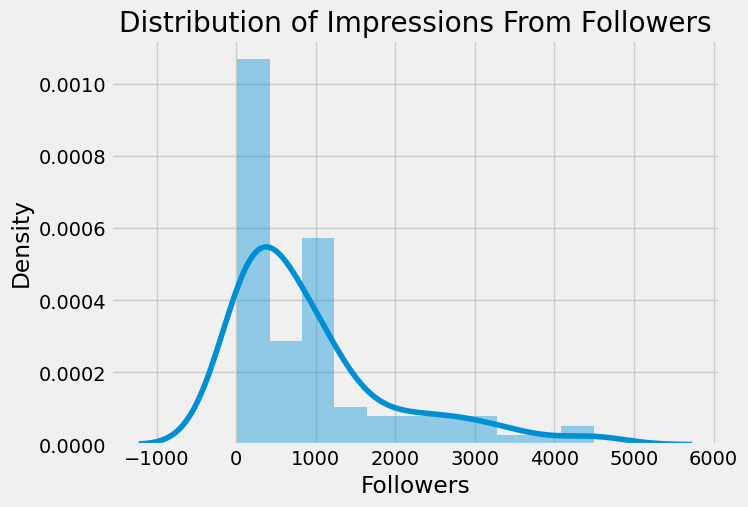

In [129]:
## Distribution of Impressions From Followers

plt.figure(figsize=(7, 5))
plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

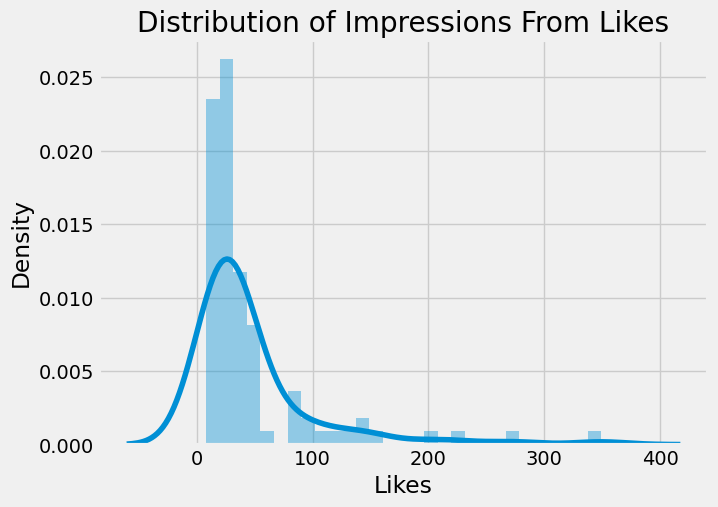

In [130]:
## Distribution of Impressions From Likes

plt.figure(figsize=(7, 5))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

## Feature Engineering

In [119]:
# Drop missing values

df = df.dropna()
df.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [120]:
# Label Encoding

le=LabelEncoder()

df['USERNAME']=le.fit_transform(df['USERNAME'])
df['Caption']=le.fit_transform(df['Caption'])
df['Hashtags']=le.fit_transform(df['Hashtags'])

df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
1,61,86,1600,14,11 hours,139
2,28,82,880,91,2 hours,23
3,3,13,255,82,2 hours,25
4,67,89,340,61,3 hours,49
5,22,30,304,60,3 hours,30


In [121]:
# Extracting the time in int format

df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(int)

df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
1,61,86,1600,14,11,139
2,28,82,880,91,2,23
3,3,13,255,82,2,25
4,67,89,340,61,3,49
5,22,30,304,60,3,30


## Model Building

In [122]:
# USERNAME feature doesnot add any weightage to model building, dropping it

X = df.drop(columns=['USERNAME', 'Time since posted', 'Likes'], axis=1)
y = df[['Time since posted', 'Likes']]

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [124]:
# Scaling the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
def evaluate_model(true, predict):
    r2 = r2_score(true, predict)
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
   
    return r2, mae,mse,

In [131]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}
r2_scores = dict()

for i in range(len(models)):    

    model = list(models.values())[i]
    
    model.fit(X_train_scaled, y_train)

    #make_prediction
    y_pred = model.predict(X_test_scaled)

    #validaiton
    R2, MAE, MSE = evaluate_model(y_test, y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    
    r2_scores[list(models.keys())[i]] = {'model': model, 'score': R2}

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 863.1231462126105
MAE: 16.24665368803942
R2 SCORE: -0.17188881640822318


model training performance Lasso()
MSE: 822.9835907246057
MAE: 15.947787109028077
R2 SCORE: -0.0946625123991448


model training performance Ridge()
MSE: 853.1399196271531
MAE: 16.196397345381193
R2 SCORE: -0.16264426682107225


model training performance ElasticNet()
MSE: 697.2410619433679
MAE: 15.501870040061489
R2 SCORE: 0.0053634637642280825


model training performance RandomForestRegressor()
MSE: 677.3858208333335
MAE: 13.553333333333333
R2 SCORE: -0.02818918946800192




In [132]:
print("R2 scores", r2_scores)

R2 scores {'LinearRegression': {'model': LinearRegression(), 'score': -0.17188881640822318}, 'Lasso': {'model': Lasso(), 'score': -0.0946625123991448}, 'Ridge': {'model': Ridge(), 'score': -0.16264426682107225}, 'Elasticnet': {'model': ElasticNet(), 'score': 0.0053634637642280825}, 'Randomforest': {'model': RandomForestRegressor(), 'score': -0.02818918946800192}}


``ElasticNet`` has the highest r2 score and lowest MSE and MAE, so it is the best model for this problem statement

In [138]:
final_model = r2_scores.get('Elasticnet').get('model')

predicted = final_model.predict([[-1.60969927, -0.65569096, -0.98358301]])

In [143]:
print('Time since posted', predicted.tolist()[0][0])
print('Likes',  predicted.tolist()[0][1])

Time since posted 3.102058851233569
Likes 13.601829028292244
